<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Analyze Traffic Accident data to Identify patterns Related to Road Conditions, Weather and Time of Day. Visualize Accident Hotspots and Contributing Factor</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score,ConfusionMatrixDisplay

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of Road Accident</strong></h1>
</div>


In [7]:
file_path = "F:\\Experiences\\01-Prodigy InfoTech-DS-Internship\\Data Sets\\Task-05.csv"
df = pd.read_csv(file_path)


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [13]:
df.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Cleaning Dataset</strong></h1>
</div>

In [9]:
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [10]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 12316 and Number of Columns: 15


In [11]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [12]:
df.sample(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
7399,31-50,Male,Junior high school,Employee,1-2yr,other,Y Shape,Asphalt roads,Daylight,Normal,Rollover,Going straight,Not a Pedestrian,No distancing,2
7614,31-50,Male,Junior high school,Employee,Above 10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overspeed,1
995,18-30,Male,Junior high school,Employee,Below 1yr,Two-way (divided with broken lines road marking),Crossing,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
8331,31-50,Male,Junior high school,Employee,Below 1yr,Double carriageway (median),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No priority to vehicle,2
5241,Over 51,Male,Junior high school,Employee,5-10yr,other,Y Shape,Asphalt roads,Daylight,Normal,Rollover,Going straight,Not a Pedestrian,Changing lane to the left,2


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Data Visualization to under stand Hidden Patterns in Data</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Accident Count by Driver's Sex</h1>
</div>

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_12804\1788731309.py:6: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='Sex_of_driver', hue='Sex_of_driver', data=df, palette=custom_palette, legend=False)


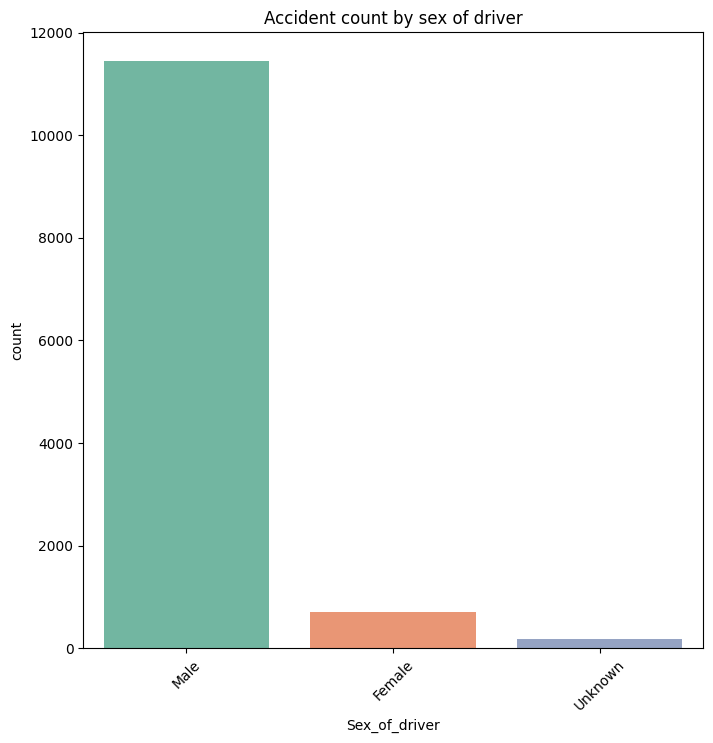

In [15]:
# Define a custom palette
custom_palette = sns.color_palette("Set2")  # You can choose other palettes like "Set1", "Pastel1", etc.

# Plot the countplot with the custom palette
plt.figure(figsize=(8,8))
sns.countplot(x='Sex_of_driver', hue='Sex_of_driver', data=df, palette=custom_palette, legend=False)
plt.title("Accident count by sex of driver")
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Distribution of Accidents by Road Conditions</strong></h1>
</div>

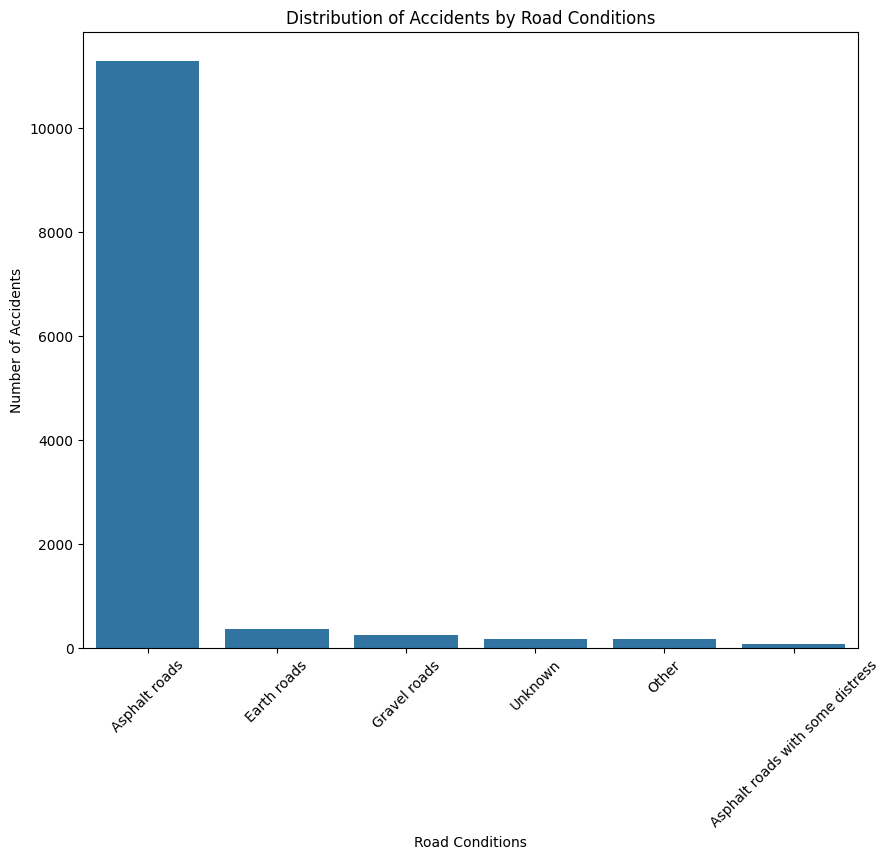

In [16]:
# Road Conditions Analysis
road_condition_counts = df['Road_surface_type'].value_counts()
#Road Conditions
plt.figure(figsize=(10, 8))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values)
plt.title('Distribution of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Distribution of Accidents by Weather Conditions</strong></h1>
</div>

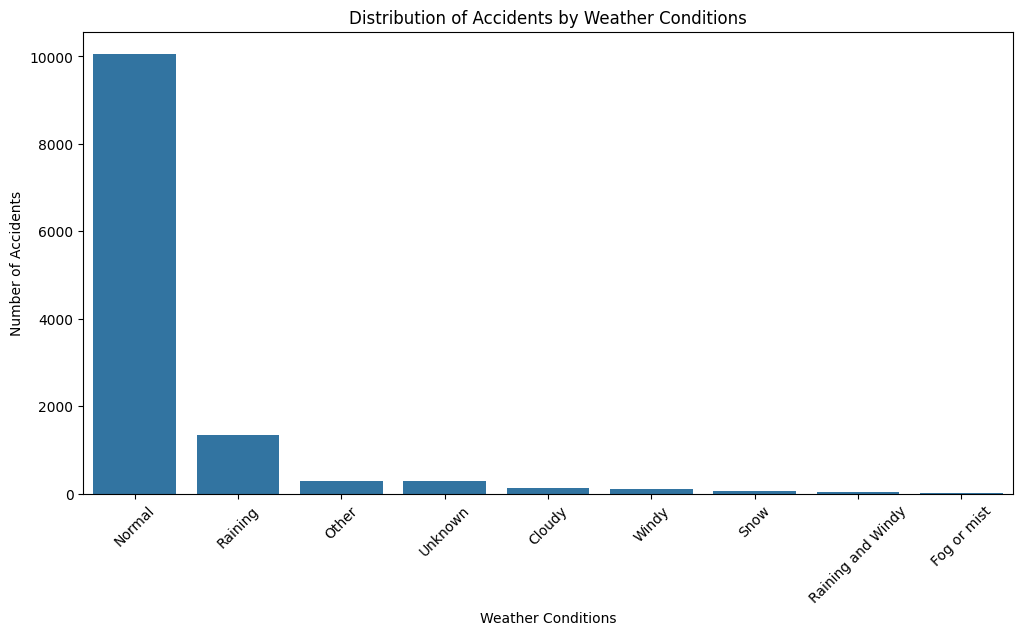

In [17]:
#Weather Conditions
weather_condition_counts = df['Weather_conditions'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Distribution of Accidents by Light Conditions</strong></h1>
</div>

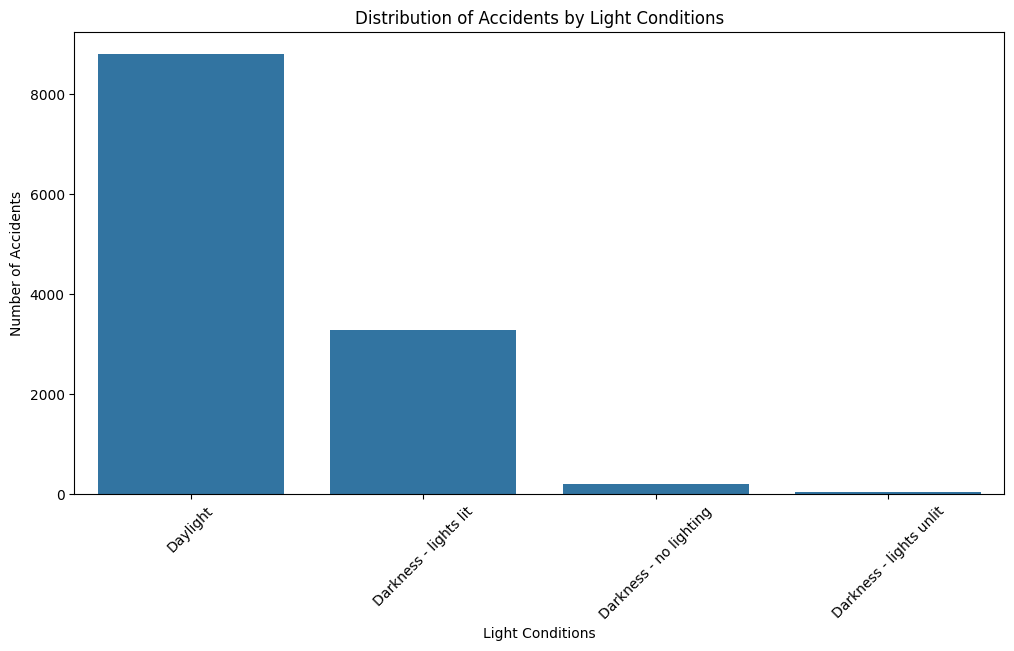

In [18]:
light_conditions_counts = df['Light_conditions'].value_counts()

# Light Conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=light_conditions_counts.index, y=light_conditions_counts.values)
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Distribution of Accidents by Age</strong></h1>
</div>

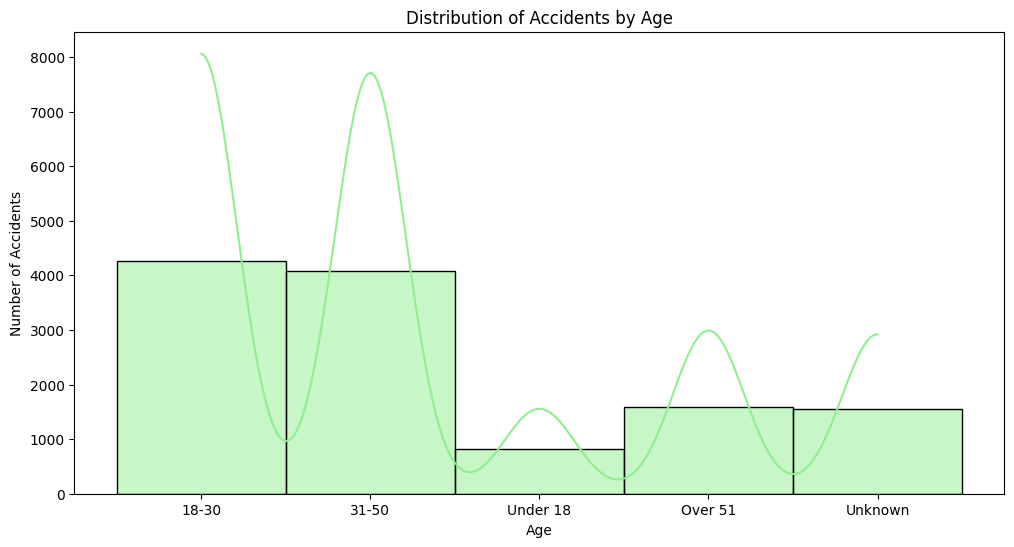

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age_band_of_driver'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Collision Types Distribution</strong></h1>
</div>

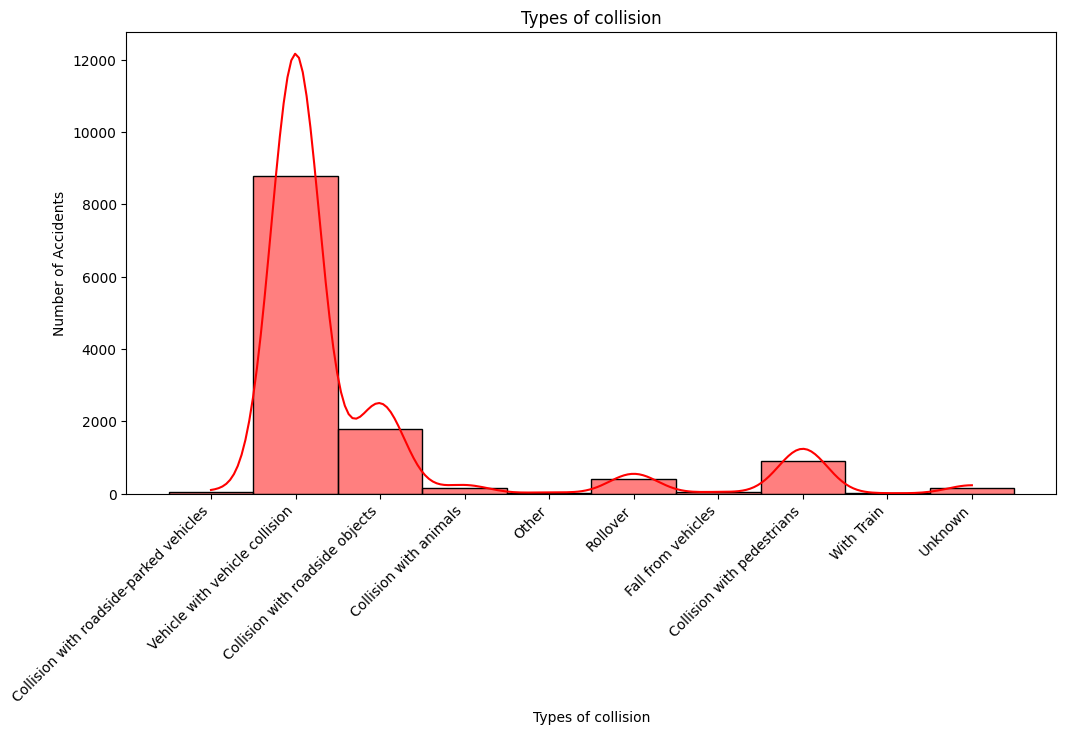

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Type_of_collision'], bins=20, kde=True, color='red')
plt.title('Types of collision')
plt.xlabel('Types of collision')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Common Causes of Accidents Data</strong></h1>
</div>

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_12804\3744201927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="Set3")


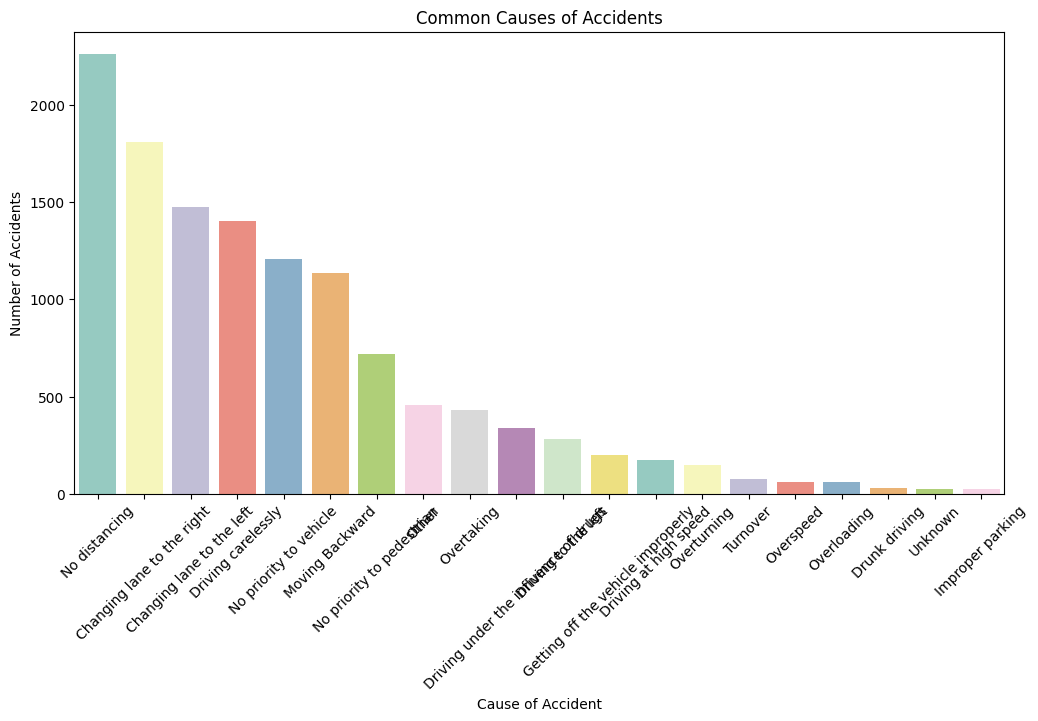

In [21]:
cause_counts = df['Cause_of_accident'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="Set3")
plt.title('Common Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Accident Severity Distribution</strong></h1>
</div>

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_12804\1459139359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")


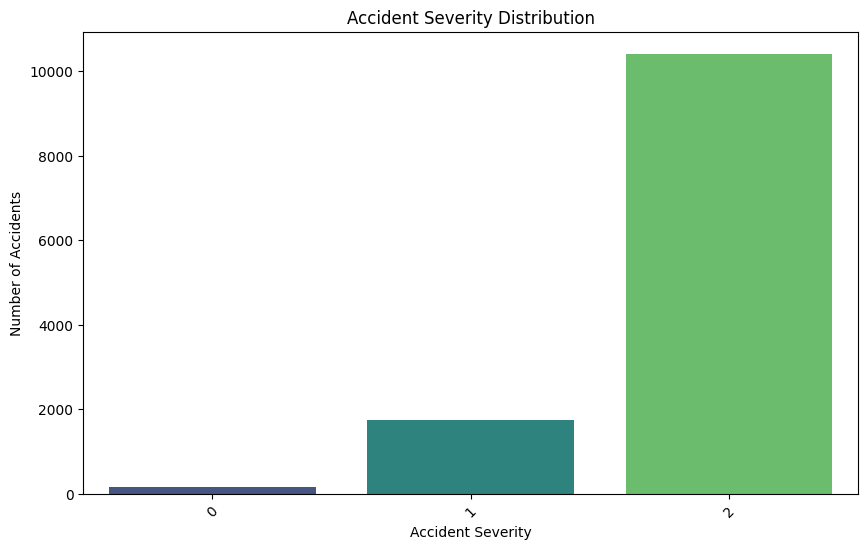

In [23]:
severity_counts = df['Accident_severity'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Correlation Matrix of Contributing Factors</strong></h1>
</div>

C:\Users\Muhammad Adeel\AppData\Local\Temp\ipykernel_12804\2349285445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_severity.index, y=correlation_with_severity.values, palette='viridis')


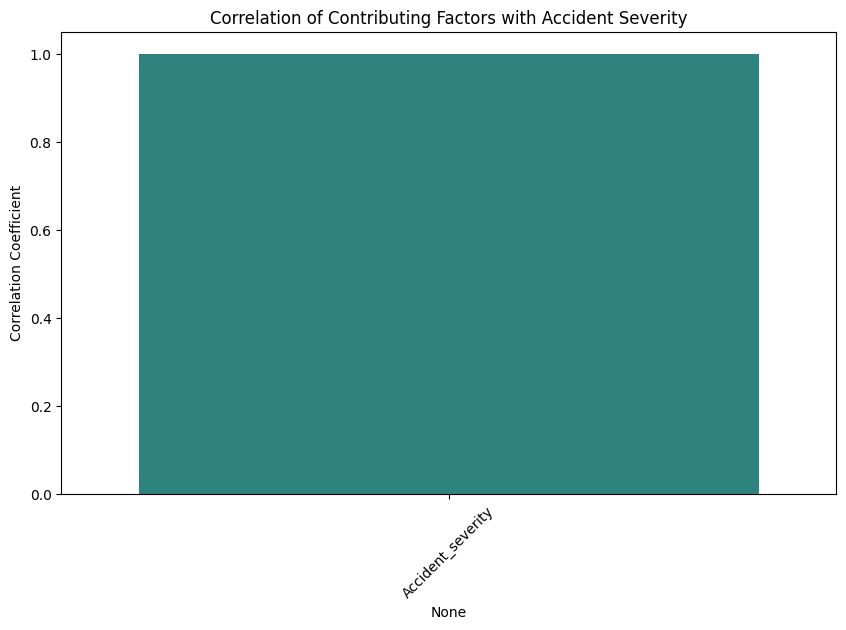

In [30]:
# Correlation with 'Accident_severity'
correlation_with_severity = correlation_matrix['Accident_severity'].sort_values(ascending=False)

# Plot the correlation with severity
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_severity.index, y=correlation_with_severity.values, palette='viridis')
plt.title('Correlation of Contributing Factors with Accident Severity')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Study Conclusion</strong></h1>
</div>

## This analysis of traffic accident data reveals key insights into accident patterns related to road conditions, weather, and time of day. Key findings include:
### Accident Trends: Significant patterns in accidents based on driver’s sex, road conditions, weather, and light conditions.
### Hotspots: Identification of high-risk areas for targeted safety measures.
### Correlations: Key factors influencing accident severity.
## These insights can guide improvements in road safety and inform future research.

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->